In [162]:
source("../BrusselSprouts/scripts/functions.R")

In [163]:
chris_crosses=data.frame(sample1=c("ACP","BAP","CCD","ATE","ACK","AKE","BAH","ANG"),
                        sample2=c("BFP","CMP","CPG","YCR","ACV","BAH","CGD","CEI"))

In [164]:
SV_filter=readLines("~/data/TRD/long_read_Andreas/goodStrains.list")
Matrix_filter=readLines("~/data/TRD/SamplesInMatrix.list")
polyploidy_filter=readLines("~/data/TRD/AD/notPolyploid.list")
distance_filter=fread("~/data/TRD/distant_comparisons.csv", data.table=FALSE)
asd2d_data=fread("~/data/TRD/asd_2d.csv", data.table=FALSE)

In [165]:
#SACE prefixed IDs are not in Matrix
summary(str_replace(polyploidy_filter[startsWith(polyploidy_filter, "SACE")],fixed("SACE_"),"") %in% Matrix_filter)
summary(polyploidy_filter[startsWith(polyploidy_filter, "SACE")] %in% Matrix_filter)

   Mode   FALSE 
logical      87 

   Mode   FALSE 
logical      87 

In [166]:
library(readxl)
Ecology=read_xlsx("/home/jnrunge/1002_strains_total_dataset.xlsx", sheet = "final_1002_site")
head(Ecology)

Standard ID,Strain Name,Ecological origin,Geographical Origin
<chr>,<chr>,<chr>,<chr>
CRI,AGME 5I,Wine,Italy
CEN,ATCC 38618:2-2,Concentrated orange juice,NA
CEP,ATCC 52922-1C,Tapuy (rice wine),Philippines
CDB,ATCC 66348-1D,Soil,Japan
ANN,AY529516,Soil beneath Quercus velutina,Ghana
BMF,269521J,Human,"RVI Newcastle, UK"


In [167]:
library(VennDiagram)
display_venn <- function(x, ...){
  library(VennDiagram)
  grid.newpage()
  venn_object <- venn.diagram(x, filename = NULL, ...)
  grid.draw(venn_object)
}

In [168]:
summary(unique(c(distance_filter$row,distance_filter$col))%in%SV_filter)
summary(unique(c(distance_filter$row,distance_filter$col))%in%Matrix_filter)
summary(unique(c(distance_filter$row,distance_filter$col))%in%polyploidy_filter)

   Mode   FALSE    TRUE 
logical    1000      11 

   Mode   FALSE    TRUE 
logical     953      58 

   Mode   FALSE    TRUE 
logical     160     851 

In [169]:
all_comparisons=fread("~/data/TRD/comparisons.csv")
all_comparisons=subset(all_comparisons, row%in%SV_filter & row%in%Matrix_filter & row%in%polyploidy_filter & 
                      col%in%SV_filter & col%in%Matrix_filter & col%in%polyploidy_filter & dist!=0)

In [170]:
summary(all_comparisons$dist)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000272 0.029007 0.038407 0.035514 0.042625 0.049672 

In [171]:
all_comparisons=left_join(all_comparisons,subset(Ecology, select=c("Standard ID","Ecological origin","Geographical Origin")),
                          by=c("row"="Standard ID"))
                          all_comparisons=left_join(all_comparisons,subset(Ecology, select=c("Standard ID","Ecological origin","Geographical Origin")),
                          by=c("col"="Standard ID"))
all_comparisons

row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
ANI,AKE,0.036102,Banana wine,"Pennsylvania, USA",Palm wine,Nigeria
AVI,AKE,0.036057,Soil beneath Quercus rubra,"Pennsylvania, USA",Palm wine,Nigeria
BAK,AKE,0.046940,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",Palm wine,Nigeria
BAN,AKE,0.042647,Rotten wood,"Wuzhi Mountain, Hainan province, China",Palm wine,Nigeria
BAP,AKE,0.042560,Soil,"Wuzhi Mountain, Hainan province, China",Palm wine,Nigeria
BET,AKE,0.049672,Seawater in harbour,"Koper, Slovenia",Palm wine,Nigeria
BFP,AKE,0.046248,Quercus sp.,Montenegro,Palm wine,Nigeria
BTI,AKE,0.040569,Quercus robur,"Vancouver, Canada",Palm wine,Nigeria
CCD,AKE,0.038407,"Flower, Heliconia sp.","Yasuni, Orellana",Palm wine,Nigeria


In [172]:
all_comparisons=subset(all_comparisons, dist>0.03)
all_comparisons$dup=NA
for(i in 1:nrow(all_comparisons)){
    all_comparisons$dup[i]=which(paste(all_comparisons$col,all_comparisons$row) == paste(all_comparisons$row[i],all_comparisons$col[i]))
}
all_comparisons$nrow=1:nrow(all_comparisons)
all_comparisons=all_comparisons[all_comparisons$dup < all_comparisons$nrow,]
nrow(all_comparisons)

[1] 39

In [173]:
IDs=unique(c(all_comparisons$row,all_comparisons$col))
length(IDs)

[1] 11

In [174]:
summary(paste(all_comparisons$row,all_comparisons$col) %in%
       c(paste(chris_crosses$sample1,chris_crosses$sample2),paste(chris_crosses$sample2,chris_crosses$sample1)))

   Mode   FALSE 
logical      39 

In [175]:
IDs_dup<-unique(c(chris_crosses$sample1,chris_crosses$sample2))[unique(c(chris_crosses$sample1,chris_crosses$sample2)) %in% IDs]

In [176]:
IDs=IDs[!(IDs%in%IDs_dup)]
IDs

[1] "ANI" "AVI" "BAK" "BAN" "BET" "BTI" "CMQ"

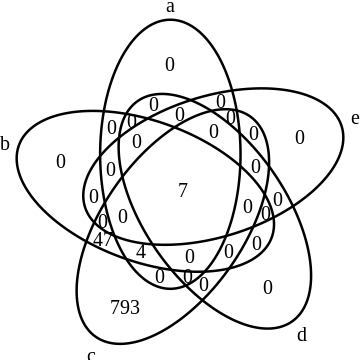

In [180]:
x=list(a=SV_filter,b=Matrix_filter,c=polyploidy_filter,d=unique(c(all_comparisons$row,all_comparisons$col)),e=IDs)
options(repr.plot.width=3, repr.plot.height=3)
display_venn(x)

In [178]:
all_comparisons=subset(all_comparisons, col%in%IDs & row%in%IDs)
all_comparisons

,row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y,dup,nrow
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
32,ANI,BAK,0.038429,Banana wine,"Pennsylvania, USA","Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",12,24
33,AVI,BAK,0.038418,Soil beneath Quercus rubra,"Pennsylvania, USA","Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",18,25
42,ANI,BAN,0.034167,Banana wine,"Pennsylvania, USA",Rotten wood,"Wuzhi Mountain, Hainan province, China",13,34
43,AVI,BAN,0.034107,Soil beneath Quercus rubra,"Pennsylvania, USA",Rotten wood,"Wuzhi Mountain, Hainan province, China",19,35
44,BAK,BAN,0.042321,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",Rotten wood,"Wuzhi Mountain, Hainan province, China",26,36
62,ANI,BET,0.043361,Banana wine,"Pennsylvania, USA",Seawater in harbour,"Koper, Slovenia",15,48
63,AVI,BET,0.043272,Soil beneath Quercus rubra,"Pennsylvania, USA",Seawater in harbour,"Koper, Slovenia",21,49
64,BAK,BET,0.047700,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",Seawater in harbour,"Koper, Slovenia",28,50
65,BAN,BET,0.047076,Rotten wood,"Wuzhi Mountain, Hainan province, China",Seawater in harbour,"Koper, Slovenia",37,51


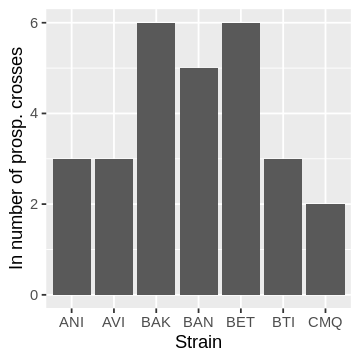

In [182]:
ggplot(mapping=aes(c(all_comparisons$row,all_comparisons$col)))+
geom_bar()+
xlab("Strain")+
ylab("In number of prosp. crosses")

In [183]:
all_comparisons=all_comparisons[order(all_comparisons$dist,decreasing = TRUE),]

In [184]:
all_comparisons$unique=FALSE
for(i in 1:nrow(all_comparisons)){
    if(i == 1){
        all_comparisons$unique[i]=TRUE
    }else{
        all_comparisons_unique=all_comparisons[1:(i-1),]
        all_comparisons_unique=subset(all_comparisons_unique, unique==TRUE)
        previous_IDs=unique(c(all_comparisons_unique$row,all_comparisons_unique$col))
        if(!(all_comparisons$row[i] %in% previous_IDs) & !(all_comparisons$col[i] %in% previous_IDs)){
            all_comparisons$unique[i]=TRUE
        }
    }
}

In [185]:
all_comparisons_unique=subset(all_comparisons, unique==TRUE)
all_comparisons_unique

,row,col,dist,Ecological origin.x,Geographical Origin.x,Ecological origin.y,Geographical Origin.y,dup,nrow,unique
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>
64,BAK,BET,0.047700,"Bark, Quercus wutaishanica","Dongling Mountain, Beijing, china",Seawater in harbour,"Koper, Slovenia",28,50,TRUE
85,BAN,BTI,0.037151,Rotten wood,"Wuzhi Mountain, Hainan province, China",Quercus robur,"Vancouver, Canada",39,67,TRUE


In [158]:
IDs=IDs[IDs%in%c(all_comparisons_unique$row,all_comparisons_unique$col)]

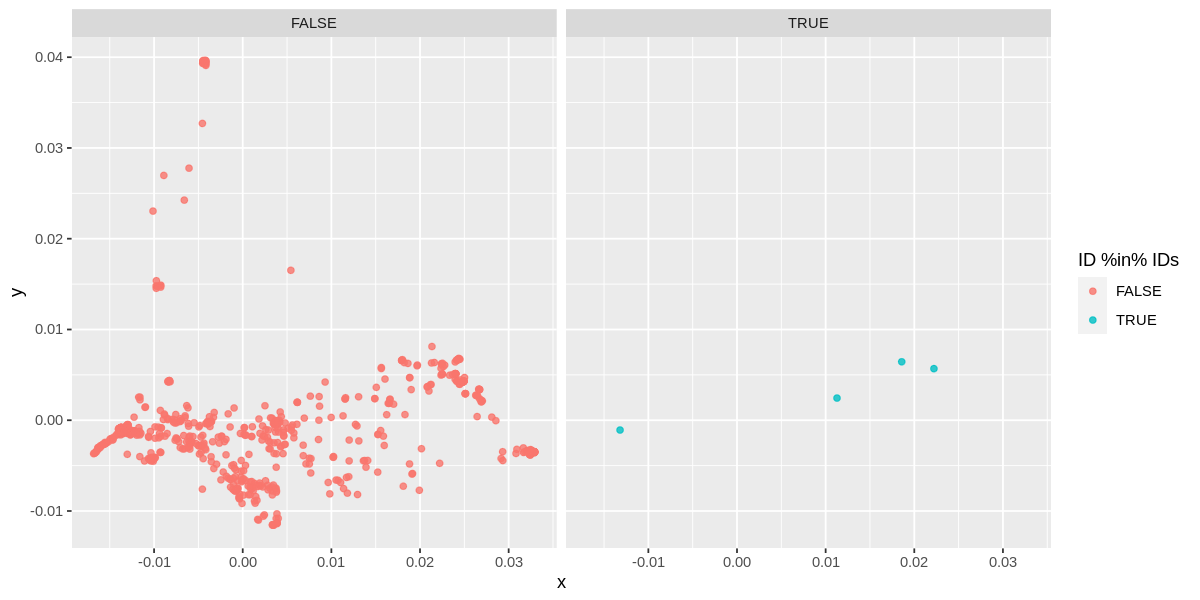

In [159]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(asd2d_data, aes(x,y,color=ID%in%IDs))+
geom_point(alpha=0.8)+
facet_wrap(~(ID%in%IDs))

In [160]:
# Ecology

summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Geographical Origin`),n=n())
summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Ecological origin`),n=n())

Geographical Origin,n
<chr>,<int>
"Dongling Mountain, Beijing, china",1
"Koper, Slovenia",1
"Vancouver, Canada",1
"Wuzhi Mountain, Hainan province, China",1


Ecological origin,n
<chr>,<int>
"Bark, Quercus wutaishanica",1
Quercus robur,1
Rotten wood,1
Seawater in harbour,1


In [161]:
summarise(group_by(filter(Ecology, `Standard ID`%in%IDs), `Geographical Origin`, `Ecological origin`),n=n())


`summarise()` has grouped output by 'Geographical Origin'. You can override using the `.groups` argument.



Geographical Origin,Ecological origin,n
<chr>,<chr>,<int>
"Dongling Mountain, Beijing, china","Bark, Quercus wutaishanica",1
"Koper, Slovenia",Seawater in harbour,1
"Vancouver, Canada",Quercus robur,1
"Wuzhi Mountain, Hainan province, China",Rotten wood,1


# Would the best case so far be filtered out?

In [188]:
"BAH" %in% SV_filter # not tested
"BAH" %in% Matrix_filter
"BAH" %in% polyploidy_filter

"CGD" %in% SV_filter # filtered out
"CGD" %in% Matrix_filter
"CGD" %in% polyploidy_filter

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE